## 3.3 Работа с данными

Для выбранного нетипичной интерпретации, обоснованной в первой домашней работе найти данные, соответствующие данной интерпретации. При этом
необходимо привести источники данных, а также сами данные (или постоянную ссылку на данные, если они взяты из открытых источников.)
В случае, если рассматриваемые данные не соответствуют интерпретации из первой домашней работы, необходимо привести обоснование выбора
данных.
Для полученных данных необходимо проделать такую же работу как и с
построенными выборками, а именно:
1. привести значение выборочного среднего и выборочной дисперсии.
2. привести значение преложенной оценки X и (в случае их несовпадения)
значение оптимальной оценки.

Данные я буду использовать [эти](https://data.sfgov.org/Public-Safety/Fire-Department-Calls-for-Service/nuek-vuh3). Для типичной интерпретации распределения Пуассона( о котором вы можете почитать в моем пдф файле в пункте 1.3 поиск примеров ... ) 

Разберемся как будем работать со временем, что бы узнать $\lambda$ 

Данные скачивая заняли: 1.76 gb , что много 

Пока оставлю это затею анализировать 2гб 

Займусь анализом вот этого файла, так как он весит 75 мб и содержит очень много даных [сайт](https://www.kaggle.com/mchirico/montcoalert/data#) в 
этом файле есть следующие колонки: 

![колонки ](https://a.radikal.ru/a13/1911/71/8efed0dda8c0.png) 


In [0]:
import pandas as pd
import numpy as np
from datetime import datetime, time, timedelta
from matplotlib import pyplot as plt
%matplotlib inline


%config InlineBackend.figure_format = 'retina'  

df = pd.read_csv('https://raw.githubusercontent.com/disc0nn3ct/math-statistics/master/forpoissonData.csv') # Решил закинуть на гит 
df.head()



,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [0]:
df['timeStamp']

0         2015-12-10 17:10:52
1         2015-12-10 17:29:21
2         2015-12-10 14:39:21
3         2015-12-10 16:47:36
4         2015-12-10 16:56:52
                 ...         
423904    2018-11-16 08:54:08
423905    2018-11-16 08:53:32
423906    2018-11-16 08:54:19
423907    2018-11-16 08:51:48
423908    2018-11-16 08:46:25
Name: timeStamp, Length: 423909, dtype: object

Видим что данные хорошо подгрузились! Проблем с обработкой теперь не должно быть. 



Надо сначала отсортировать данные по времени.  [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [0]:
tr = df['timeStamp'].sort_values().reset_index(drop = True) # отсортировали и выкинули прошлые индексы 
print(tr)
time1 = int(input('Введите промежуток времени за который будем смотреть  в секундах: '))  # в минутах оказалось слишком грубо... => будут секунды( пока похоже на что-то между 3-4 минутами)

0         2015-12-10 14:39:21
1         2015-12-10 15:39:04
2         2015-12-10 16:17:05
3         2015-12-10 16:32:10
4         2015-12-10 16:46:48
                 ...         
423904    2018-11-16 08:53:32
423905    2018-11-16 08:54:08
423906    2018-11-16 08:54:19
423907    2018-11-16 08:54:52
423908    2018-11-16 08:55:36
Name: timeStamp, Length: 423909, dtype: object
Введите промежуток времени за который будем смотреть  в секундах: 3600


Получим кол-во звонков за заданный промежуток (заданный выше)  [time](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

In [0]:
poissonDANN = []
date_index1 = datetime.strptime(tr[0], "%Y-%m-%d %H:%M:%S")
minutessett = timedelta(seconds = time1)
date_index2 = date_index1 + minutessett
counterr = 0 
i = 0 
# while i != len(tr)
for i in range(len(tr)):
  trin = datetime.strptime(tr[i], "%Y-%m-%d %H:%M:%S")
  # print('im here', trin, ' dddddd  = ')
  if date_index1 <= trin < date_index2:
    # print('im near first = ', date_index1, ' trin = ', trin, ' second = ', date_index2)
    counterr+=1
    # print(' countrrr  = = = ', counterr)
  else:
    date_index1 = date_index2
    date_index2 += minutessett
    poissonDANN.append(counterr)
    # print(' date_index1  = ', date_index1, ' trrrrrrr = ', trin , 'date_index2 = ', date_index2, ' URRRRRRRRRRRAAAAAAAAAA =-=-=-= ', poissonDANN)
    counterr = 0 

print("uRA", poissonDANN)
# print(' first = ', date_index1, ' second = ', date_index2)
# print(date_index1 + minutessett)


uRA [2, 1, 11, 25, 24, 12, 12, 8, 9, 3, 4, 3, 4, 9, 3, 9, 8, 18, 19, 15, 16, 17, 27, 21, 19, 33, 30, 32, 25, 20, 10, 10, 11, 6, 6, 4, 9, 5, 9, 3, 11, 5, 8, 22, 17, 17, 23, 21, 22, 27, 26, 18, 40, 16, 24, 19, 16, 13, 4, 4, 9, 1, 1, 5, 13, 10, 14, 14, 15, 21, 16, 18, 22, 10, 16, 27, 21, 12, 11, 12, 8, 4, 8, 5, 3, 2, 8, 10, 24, 21, 26, 16, 17, 22, 31, 18, 18, 37, 34, 35, 17, 21, 23, 9, 10, 4, 5, 7, 2, 11, 5, 2, 8, 20, 31, 24, 34, 24, 24, 26, 24, 21, 28, 29, 19, 10, 11, 24, 3, 4, 2, 7, 6, 1, 10, 11, 15, 23, 15, 20, 15, 18, 13, 27, 15, 22, 35, 29, 14, 22, 15, 8, 7, 7, 3, 7, 1, 2, 2, 5, 14, 29, 18, 14, 14, 16, 22, 33, 26, 27, 28, 32, 20, 17, 16, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 12, 13, 14, 20, 22, 32, 32, 27, 26, 37, 33, 13, 22, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 15, 19, 23, 22, 18, 22, 5, 22, 26, 22, 12, 8, 12, 10, 8, 8, 10, 7, 3, 5, 3, 12, 8, 10, 10, 8, 13, 13, 20, 16, 17, 15, 10, 14, 11, 8, 8, 5, 14, 7, 9, 4, 7, 6, 11, 13, 16, 18, 19, 18, 24, 28, 17, 19, 39, 28, 38, 13, 16, 10, 18, 14

In [0]:
poissonDANN.count(0)

240

In [0]:
len(poissonDANN) # длина нашей новой выборки :) 

25722

# Задание 1 выборочное среднее и выборочная дисперсия

## Выборочное среднее 

In [0]:
def Average(lst): 
    return sum(lst)/len(lst) 

print(Average(poissonDANN))

15.479667210947827


## Выборочная дисперсия

In [0]:
def dispersionn(arr): 
  # print('arr ==== ', len(arr) )
  xmean = Average(arr)
  # print('xmean', xmean)
  summ = 0
 
  # for i in range(len(arr)):
  for c in range(len(arr)):
    # print(' cccc = ', c)
    summ += (arr[c]-xmean)**2
  # print('summ = ', summ)
  return summ/len(arr)


print(dispersionn(poissonDANN))


NameError: ignored

Мне надоело искать промежуток за который берем, поэтому автоматизирую поиск ламбды 

In [0]:
def generett(sec):
  poissonDANN = []
  print('  immmm here sec = ', sec)
  date_index1 = datetime.strptime(tr[0], "%Y-%m-%d %H:%M:%S")
  minutessett = timedelta(seconds = sec)
  date_index2 = date_index1 + minutessett
  counterr = 0 
  i = 0 
  # while i != len(tr)
  for i in range(len(tr)):
    trin = datetime.strptime(tr[i], "%Y-%m-%d %H:%M:%S")
    # print('im here', trin, ' dddddd  = ')
    if date_index1 <= trin < date_index2:
      # print('im near first = ', date_index1, ' trin = ', trin, ' second = ', date_index2)
      counterr+=1
      # print(' countrrr  = = = ', counterr)
    else:
      date_index1 = date_index2
      date_index2 += minutessett
      poissonDANN.append(counterr)
      # print(' date_index1  = ', date_index1, ' trrrrrrr = ', trin , 'date_index2 = ', date_index2, ' URRRRRRRRRRRAAAAAAAAAA =-=-=-= ', poissonDANN)
      counterr = 0 
  return(poissonDANN)


# print(' first = ', date_index1, ' second = ', date_index2)
# print(date_index1 + minutessett)


In [0]:
# где-то между 3 - 4 минутами => 180-240 секунд   
# и нам нужно, что-бы лямбды сравнялись и кол-во не нулевых было много
minn = 3 
mint = 0
for t in range(240,180,-1):
  print('tt = ',t)
  cc = generett(t)
  if cc.count(0) > (len(cc)-100): 
    print(' error')
    break 
  lol = abs(dispersionn(cc) - Average(cc))
  if lol < minn:
    mint = t 
    minn = lol

print('vin t = ', t)




tt =  240
  immmm here sec =  240
tt =  239
  immmm here sec =  239
tt =  238
  immmm here sec =  238
tt =  237
  immmm here sec =  237
tt =  236
  immmm here sec =  236
tt =  235
  immmm here sec =  235
tt =  234
  immmm here sec =  234
tt =  233
  immmm here sec =  233
tt =  232
  immmm here sec =  232
tt =  231
  immmm here sec =  231
tt =  230
  immmm here sec =  230
tt =  229
  immmm here sec =  229
tt =  228
  immmm here sec =  228
tt =  227
  immmm here sec =  227
tt =  226
  immmm here sec =  226
tt =  225
  immmm here sec =  225
tt =  224
  immmm here sec =  224
tt =  223
  immmm here sec =  223
tt =  222
  immmm here sec =  222
tt =  221
  immmm here sec =  221




# Построим графики как в дз 1 и посмотрим на них ! * _ * 

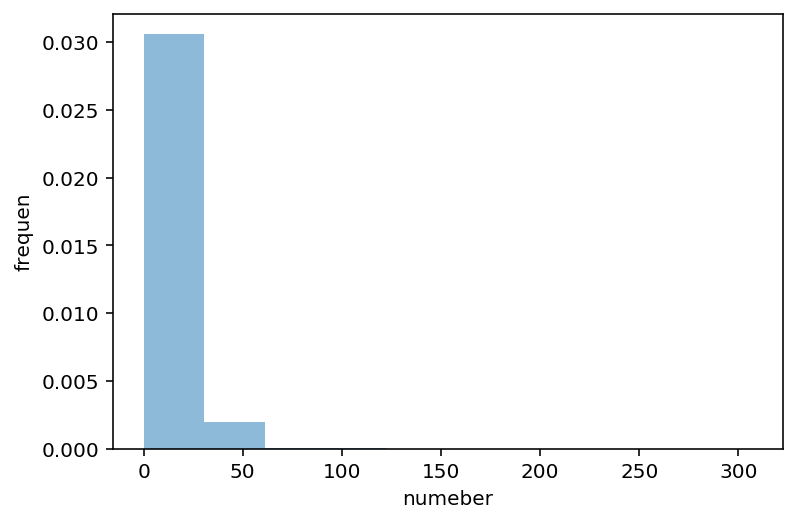

In [0]:
import matplotlib.pyplot as plt



def postr1(r):
  fig, ax = plt.subplots(1,1)
  plt.hist(r, alpha=0.5, histtype='stepfilled',density=True)
  plt.xlabel('numeber')
  plt.ylabel('frequen')
    


postr1(poissonDANN)

# Попытка 2 с выбором промежутка времени для анализа

3600 секунд 

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime, time, timedelta
from matplotlib import pyplot as plt
%matplotlib inline


%config InlineBackend.figure_format = 'retina'  

df = pd.read_csv('https://raw.githubusercontent.com/disc0nn3ct/math-statistics/master/forpoissonData.csv') # Решил закинуть на гит 
df.head()

# def generett(sec):
#   poissonDANN = []
#   print('  immmm here sec = ', sec)
#   date_index1 = datetime.strptime(tr[0], "%Y-%m-%d %H:%M:%S")
#   minutessett = timedelta(seconds = sec)
#   date_index2 = date_index1 + minutessett
#   counterr = 0 
#   i = 0 
#   # while i != len(tr)
#   for i in range(len(tr)):
#     trin = datetime.strptime(tr[i], "%Y-%m-%d %H:%M:%S")
#     # print('im here', trin, ' dddddd  = ')
#     if (date_index1 <= trin < date_index2) and ( 0<= date_index1.hour) and (date_index2.hour<= 9):
#       # print('im near first = ', date_index1, ' trin = ', trin, ' second = ', date_index2)
#       counterr+=1
#       # print(' countrrr  = = = ', counterr)
#     else:
#       date_index1 = date_index2
#       date_index2 += minutessett
#       poissonDANN.append(counterr)
#       # print(' date_index1  = ', date_index1, ' trrrrrrr = ', trin , 'date_index2 = ', date_index2, ' URRRRRRRRRRRAAAAAAAAAA =-=-=-= ', poissonDANN)
#       counterr = 0 
#   return(poissonDANN)

# # print(' first = ', date_index1, ' second = ', date_index2)
# # print(date_index1 + minutessett)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [0]:
tr = df['timeStamp'].sort_values().reset_index(drop = True) # отсортировали и выкинули прошлые индексы 
print(tr)
time1 = int(input('Введите промежуток времени за который будем смотреть  в секундах: '))  # в минутах оказалось слишком грубо... => будут секунды( пока похоже на что-то между 3-4 минутами)

0         2015-12-10 14:39:21
1         2015-12-10 15:39:04
2         2015-12-10 16:17:05
3         2015-12-10 16:32:10
4         2015-12-10 16:46:48
                 ...         
423904    2018-11-16 08:53:32
423905    2018-11-16 08:54:08
423906    2018-11-16 08:54:19
423907    2018-11-16 08:54:52
423908    2018-11-16 08:55:36
Name: timeStamp, Length: 423909, dtype: object
Введите промежуток времени за который будем смотреть  в секундах: 3600


In [0]:
from datetime import datetime
from datetime import timedelta
import time
# from datetime import datetime

def generebyrime(minH,maxH,sec):
  poissonDANN = []
  datmass = []
  date_index1 = datetime.strptime(tr[0], "%Y-%m-%d %H:%M:%S")
  # cumtozero = timedelta(hours = date_index1.hour, minutes = date_index1.minute )
  # date_index1 = date_index1 - cumtozero # чтобы с 00.00 начинались промежутки  
  # print(date_index1.hour)
  minutessett = timedelta(seconds = sec)
  # date_index2 = date_index1 + minutessett
  # print('date_index1 = ', date_index1,'date_index2 = ' ,date_index2)
  
  
  counterr = 0 
  i = 0
  cc = 0 
  while  i < len(tr):
    trin = datetime.strptime(tr[i], "%Y-%m-%d %H:%M:%S")
    # print(trin)
    if (minH <= trin.hour) and (trin.hour < maxH):
      leftHt = datetime(trin.year, trin.month, trin.day, minH)
      # print('fgfgfg ', leftHt)
      rightHt = leftHt + minutessett
      while (i < len(tr)):
        trinn = datetime.strptime(tr[i], "%Y-%m-%d %H:%M:%S")
        if (trinn.hour > maxH):
          # print('1111omg == datmass ==', datmass, 'poisso123123123nDANN', poissonDANN,' cc = ',cc)
          poissonDANN.append(datmass)
          # print('omg == datmass ==', datmass, 'poissonDANN', poissonDANN,' cc = ',cc)
          cc +=1 
          datmass = []
          counterr = 0 
          break
        if (leftHt <= trinn) and (trinn <= rightHt):    
          i += 1  
          # print(' leftHt  = ', leftHt, ' trrrrrrr = ', trinn , 'rightHt = ', rightHt,'lol = ', datmass,' URRRRRRRRRRRAAAAAAAAAA =-=-=-= ', poissonDANN)
          counterr+=1
        else:  
          leftHt = rightHt
          rightHt += minutessett
          datmass.append(counterr)
          counterr = 0
    else:
      i+=1
    #print(trin)
    #datmass.append(counterr)

  return poissonDANN

lennpoimas = len(generebyrime(1,6,time1)) #1071 ячейка => дней 
poimass = generebyrime(1,6,time1) # Наши данные собраны # 1-6 


In [0]:
lennpoimas

1071

In [0]:
for t in range(lennpoimas):
  print(sum(poimass[t])/len(poimass[t]))   # действительно видим, что средняя по дням ~ однинаковая =D 

5.6
7.4
4.8
6.4
7.0
6.4
4.4
0.2
7.4
8.2
5.4
6.8
8.0
6.8
5.0
8.4
6.0
7.0
7.6
5.0
7.4
6.2
6.8
5.2
7.4
5.6
5.0
4.8
8.6
8.8
6.0
3.4
7.4
5.2
7.8
5.4
6.8
5.0
6.4
4.2
4.2
5.6
19.4
13.6
8.2
8.2
7.8
5.6
5.0
8.0
5.2
6.2
5.6
4.0
4.8
4.0
5.6
6.4
5.8
4.6
5.2
5.6
3.8
5.6
6.6
6.8
13.2
4.4
4.8
5.2
8.0
6.2
5.0
3.8
5.4
7.6
5.0
10.6
9.4
7.6
3.4
6.2
3.8
5.0
7.4
5.2
6.2
5.6
5.6
5.8
4.6
5.8
6.0
6.8
5.4
6.0
3.6
5.0
7.8
6.4
5.4
3.2
5.0
7.4
4.8
6.0
6.6
7.4
5.6
3.8
4.2
7.0
6.6
15.8
5.6
5.0
5.2
5.4
5.2
6.8
5.8
5.6
3.6
6.0
3.2
6.2
7.8
5.0
4.8
4.2
3.2
4.4
5.8
7.0
6.6
5.8
5.0
6.0
5.8
8.2
6.2
7.0
4.0
4.8
4.4
5.2
5.6
6.4
5.6
5.6
4.2
5.4
5.2
7.6
6.6
6.4
5.4
5.4
4.0
5.6
3.2
5.6
6.2
6.4
4.0
6.2
5.8
7.0
8.2
5.2
5.6
5.8
3.8
4.4
6.0
6.0
6.8
4.4
5.8
4.4
5.2
4.6
6.2
8.6
5.4
6.2
5.4
4.8
6.6
6.0
6.4
5.4
6.2
5.2
5.2
3.8
5.2
6.6
6.6
6.6
5.8
5.2
8.0
5.2
5.6
4.8
6.6
5.0
6.4
4.8
4.8
4.0
6.2
6.4
6.6
6.6
4.0
8.2
8.2
3.6
6.0
6.0
5.2
6.2
6.2
9.0
9.0
6.6
6.4
7.0
6.2
4.8
11.6
6.2
7.4
4.2
7.0
5.6
9.2
9.0
5.8
3.8
4.2
5.6
4.4
8.6
7.8
4.2
5.

Получим среднюю по всем дням:

In [0]:
def meanpois(poimass, lennpoimas):
  allsumm = 0 
  allleng = 0
  for g in range(lennpoimas):
    allsumm+=sum(poimass[g])
    allleng+=len(poimass[g])
  return allsumm/allleng

meanpois(poimass, lennpoimas)


6.237161531279178

Надем дисперсию =D барабанная дробь 

In [0]:
def dispersionn(poimass, lennpoimas):
  sumdisp = 0 
  lenndisp = 0 
  mm = meanpois(poimass, lennpoimas)
  for t in range(lennpoimas):
    lenndisp+=len(poimass[t])
    for r in range(len(poimass[t])):
      sumdisp+=(poimass[t][r]-mm)**2
  return sumdisp/lenndisp

dispersionn(poimass, lennpoimas)

12.0808225686787

# Поиск лучших промежутков в дне НЕ ОБНОВЛЯТЬ!
Поиск промежутков: где M = $\lambda$, и D = $\lambda$  примерно => примерно равны друг другу. 

In [0]:
def poisk(time1): 
  minn = 100
  mini = -1
  minj = -1
  mn = -1 
  md = -1
  for i in range(1,24):
    for j in range(i+1,22):

      print('i = ', i, ' j =', j) 

      poimass1 = generebyrime(i,j,time1)
      lennpoimas = len(poimass1)
      meanpois1 = meanpois(poimass1, lennpoimas)
      dispersionn1 = dispersionn(poimass1, lennpoimas)
      deltt = abs(dispersionn1-meanpois1)
      print('len ', lennpoimas, 'Среднее = ', meanpois1, 'Дисперсия = ', dispersionn1, 'delta = ', deltt)
      if deltt < minn: 
        minn = deltt
        mini = i
        minj = j 
        mn = meanpois1
        md = dispersionn1
  print('минимальное при i =', mini,'минимальное при j = ', minj, 'минимальная дельта =', minn, ' минимальное среднее = ',mn ,'минимальная дисперсия = ', md) 



poisk(3600)

i =  1  j = 2
len  1065 Среднее =  6.928030303030303 Дисперсия =  13.663380968778721 delta =  6.735350665748419
i =  1  j = 3
len  1070 Среднее =  6.627110694183865 Дисперсия =  12.975869137840698 delta =  6.348758443656833
i =  1  j = 4
len  1070 Среднее =  6.29204368174727 Дисперсия =  11.704414076095054 delta =  5.412370394347784
i =  1  j = 5
len  1070 Среднее =  6.097144194756554 Дисперсия =  11.14997311778458 delta =  5.052828923028025
i =  1  j = 6
len  1071 Среднее =  6.237161531279178 Дисперсия =  12.0808225686787 delta =  5.843661037399522
i =  1  j = 7
len  1072 Среднее =  6.923340071528534 Дисперсия =  17.230167416461367 delta =  10.306827344932833
i =  1  j = 8
len  1071 Среднее =  8.275710284113645 Дисперсия =  34.317607955550095 delta =  26.041897671436452
i =  1  j = 9
len  1071 Среднее =  9.756974436792342 Дисперсия =  54.165988184592024 delta =  44.40901374779968
i =  1  j = 10
len  1071 Среднее =  11.029259182402988 Дисперсия =  68.22408683446324 delta =  57.19482765

Запищем вывод в файл на всякий случай.

In [0]:
def poisk1(time1): 
  f = open('1hour.txt','w')  # Запишем это в файл 
  minn = 100
  mini = -1
  minj = -1
  mn = -1 
  md = -1
  for i in range(1,24):
    for j in range(i+1,22):
      f.write( 'i = ' + str(i) + ' j =' + str(j) + "\n")  # запись в файл
      # print('i = ', i, ' j =', j) 

      poimass1 = generebyrime(i,j,time1)
      lennpoimas = len(poimass1)
      meanpois1 = meanpois(poimass1, lennpoimas)
      dispersionn1 = dispersionn(poimass1, lennpoimas)
      deltt = abs(dispersionn1-meanpois1)
      f.write('len ' + str(lennpoimas)  + ' Среднее = ' + str(meanpois1) + ' Дисперсия = ' +  str(dispersionn1) + ' delta = ' + str(deltt) + "\n") 
      # print('len ', lennpoimas, 'Среднее = ', meanpois1, 'Дисперсия = ', dispersionn1, 'delta = ', deltt)
      if deltt < minn: 
        minn = deltt
        mini = i
        minj = j 
        mn = meanpois1
        md = dispersionn1
  f.write(' минимальное при i =' + str(mini) + ' минимальное при j = ' + str(minj) + ' минимальная дельта =' + str(minn) +  ' минимальное среднее = ' + str(mn) + ' минимальная дисперсия = '+ str(md) + "\n")  
  f.close() 
  # print('минимальное при i =', mini,'минимальное при j = ', minj, 'минимальная дельта =', minn, ' минимальное среднее = ',mn ,'минимальная дисперсия = ', md) 

poisk1(3600)


Залил на [git](https://github.com/disc0nn3ct/math-statistics/blob/master/1hour.txt) файл с анализом промежутков 


Пока понравился промежуток 1-6 ч. 

In [0]:
f = open('1hour.txt','w')  # Запишем это в файл 

for j in range(5):
  f.write('Hello' + str(j)+'' + "\n")  # запись Hello World в файл
f.close() 

In [0]:
f = open('xyz.txt','r')
f.read()

'Hello0\nHello1\nHello2\nHello3\nHello4\n'

In [0]:
import numpy as np

a = np.eye(4, 5)
print(a[[0, 3], [1, 3]] )

[0. 1.]


# Построение Графика эмпирической функции распределения 

In [0]:
allinone = []
for i in range(len(poimass)):
  allinone = allinone + poimass[i]


In [0]:
allinone

[4,
 4,
 9,
 6,
 5,
 5,
 5,
 11,
 5,
 11,
 5,
 5,
 8,
 2,
 4,
 11,
 4,
 3,
 4,
 10,
 10,
 3,
 7,
 9,
 6,
 6,
 8,
 4,
 6,
 8,
 9,
 3,
 2,
 3,
 5,
 0,
 0,
 0,
 0,
 1,
 9,
 10,
 8,
 5,
 5,
 6,
 9,
 9,
 5,
 12,
 9,
 3,
 6,
 4,
 5,
 10,
 5,
 4,
 1,
 14,
 10,
 7,
 7,
 10,
 6,
 7,
 10,
 2,
 9,
 6,
 5,
 7,
 6,
 5,
 2,
 5,
 12,
 7,
 5,
 13,
 5,
 8,
 6,
 2,
 9,
 8,
 6,
 3,
 11,
 7,
 8,
 5,
 16,
 4,
 5,
 5,
 5,
 4,
 8,
 3,
 11,
 13,
 6,
 3,
 4,
 6,
 11,
 3,
 4,
 7,
 3,
 6,
 8,
 10,
 7,
 8,
 5,
 3,
 4,
 6,
 6,
 10,
 4,
 5,
 12,
 4,
 6,
 8,
 5,
 5,
 7,
 8,
 1,
 4,
 5,
 3,
 3,
 7,
 5,
 6,
 9,
 6,
 15,
 3,
 10,
 10,
 7,
 8,
 10,
 9,
 4,
 6,
 5,
 8,
 7,
 1,
 4,
 1,
 4,
 7,
 5,
 8,
 7,
 6,
 11,
 9,
 5,
 7,
 3,
 2,
 5,
 9,
 10,
 8,
 7,
 5,
 2,
 9,
 4,
 7,
 11,
 8,
 7,
 7,
 1,
 6,
 3,
 6,
 4,
 6,
 4,
 6,
 3,
 4,
 15,
 6,
 4,
 4,
 4,
 3,
 4,
 8,
 3,
 2,
 4,
 6,
 4,
 3,
 10,
 5,
 20,
 18,
 20,
 21,
 18,
 13,
 11,
 14,
 14,
 16,
 4,
 13,
 6,
 6,
 12,
 7,
 7,
 12,
 11,
 4,
 13,
 7,
 6,
 5,
 8,
 2,
 8,
 1,
 9

0 42


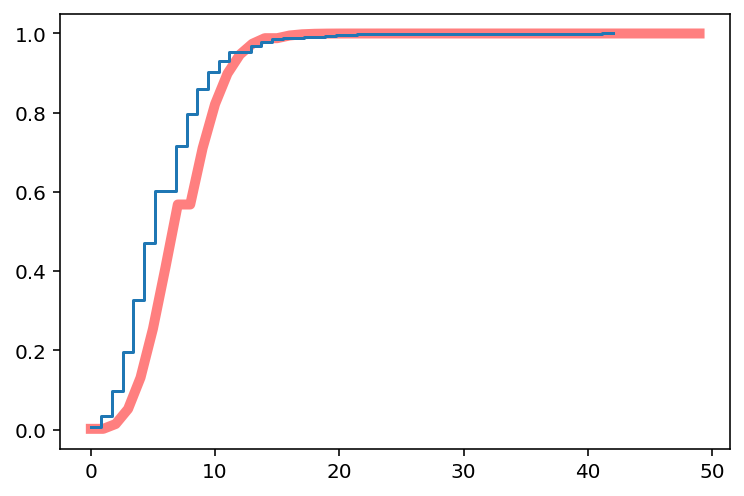

In [0]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

sample = allinone
ecdf = sm.distributions.ECDF(sample)
x = np.linspace(min(sample), max(sample))
# k = np.linspace(min(sample),max(sample),100)
print(min(sample),max(sample))
lam = 6.237161531279178 
y = ecdf(x)
plt.plot(poisson.cdf(x, lam),'r-', lw=5, alpha=0.5, label='poisson pmf')
plt.step(x, y)
plt.show()

Заметим что графики при выборочной средней ввиде лямбды практически совпали, что говорит, что мы хорошо подобрали вид распределеине и мы можем описывать данную выборку Распределением Пуассона 

Частотный анализ 


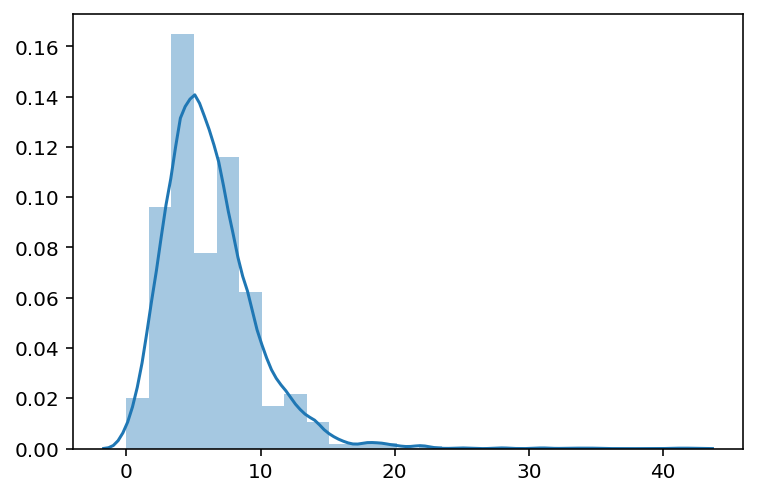

In [0]:
import seaborn as sn
sn.distplot(allinone,bins=25)

Видим что тоже очень хорошо похоже на Пуассона 

# Проверка гипотизы по $\chi^2$

Предположим что данная выборка подчиняется закону распределения Пуассона. 

In [0]:
import numpy as np
import pandas as pd
from collections import Counter
import math 
# print(np.unique(obidenenie(poison10005)))
# print(Counter(obidenenie(poison10005)))
# print(len(obidenenie(poison10005)))
print('В результате опроса 500к людей были получены данные о количестве просматриваемых за месяц серий аниме на этапе "онгоинг" :')
for i in np.unique(allinone):
  print(i , ' = ', Counter(allinone)[i])



В результате опроса 500к людей были получены данные о количестве просматриваемых за месяц серий аниме на этапе "онгоинг" :
0  =  39
1  =  142
2  =  342
3  =  524
4  =  703
5  =  779
6  =  699
7  =  609
8  =  434
9  =  334
10  =  226
11  =  152
12  =  121
13  =  76
14  =  63
15  =  32
16  =  17
17  =  7
18  =  14
19  =  12
20  =  7
21  =  3
22  =  8
23  =  1
25  =  2
28  =  2
31  =  2
33  =  1
34  =  1
35  =  1
41  =  1
42  =  1


Соответствует ли данное распределение закону редких событий Пуассона? 
Решение: 
Проверим с помощью $\chi^2$ -критерия Пирсона нулевую гипотезу $H_0$ = (Число
просматриваемых за месяц серий аниме на этапе "онгоинг" распределено по закону Пуассона), то есть $$ p_k = P(X=k)=\frac{\lambda^k}{k!}e^{-\lambda}, k = 0,1,2... $$
При уровне значимости 10% и 5% (из задания)

Выборочная средняя $\overline{x}$

In [0]:
import numpy as np

print('Выборочное среднее = ', np.mean(allinone) )

Выборочное среднее =  6.237161531279178


In [0]:
len(allinone)

5355

Примем в качестве оценки $\lambda$ среднее число журналов $\lambda = \overline{x}$ среднее число просмотренных тайтлов. 

Найдем теоритические вероятности $p_k$ и теоритические частоты $n_k'=n\cdotp_k=5355\cdot p_k$ И создадим таблицу для наглядности: 

In [0]:
import math
import pandas as pd
import numpy as np

def teorver(k):
  return ((((np.mean(allinone)))**k)*math.exp(-np.mean(allinone)))/(math.factorial(k))


df = pd.DataFrame(columns = ['k', 'n_k', 'p_k','n_k*'])
df['k'] = np.unique(allinone)
for i in range(len(np.unique(allinone))):
    df['n_k'][i] = Counter(allinone)[df.iloc[i][0]]
    df['p_k'][i] = teorver(df.iloc[i][0])
    # print('f',df.iloc[i][0], 'i',i )
    # print(Counter(allinone)[i])
    df['n_k*'][i] = len(allinone)*df['p_k'][i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [0]:
df

,k,n_k,p_k,n_k*
0,0,39,0.0019554,10.4712
1,1,142,0.0121961,65.3103
2,2,342,0.0380346,203.675
3,3,524,0.079076,423.452
4,4,703,0.123303,660.285
5,5,779,0.153812,823.661
6,6,699,0.159891,856.217
7,7,609,0.142467,762.91
8,8,434,0.111074,594.799
9,9,334,0.0769759,412.206


В книге в параграфе [10](https://drive.google.com/drive/folders/1Tc1lvCc7X-agu7XDbAYaISW5ndeayzg5) написано, что: крайней мере минимальная ожидаемая частота должна быть больше 1. Объединяем малочисленные частоты:

In [0]:
# df[10:19].sum()
Ndf = df.copy(deep=True)

In [0]:
# print(df)

# Ndf.iloc['20']=Ndf.iloc[10]
Ndf.loc['>9'] = Ndf[9:32].sum()
Ndf.drop(list(range(9,32)), inplace = True) 
Ndf.loc[3] =  Ndf[0:4].sum()
Ndf.drop(list(range(0,3)), inplace = True)                                                                                                              
Ndf['(n_k-n_k*)^2/n_k*'] = ((Ndf['n_k'] - Ndf['n_k*'])**2)/Ndf['n_k*']

Ndf.loc['sum'] = Ndf.sum()



In [0]:
Ndf =  Ndf.rename({3: '0-3'})


In [0]:
Ndf

,k,n_k,p_k,n_k*,(n_k-n_k*)^2/n_k*
0-3,21.0,3228,0.568267,3043.07,11.2381
4,4.0,703,0.123303,660.285,2.76332
5,5.0,779,0.153812,823.661,2.4216
6,6.0,699,0.159891,856.217,28.8681
7,7.0,609,0.142467,762.91,31.0497
8,8.0,434,0.111074,594.799,43.4706
>9,509.0,1084,0.178192,954.219,17.6511
sum,560.0,7536,1.43701,7695.16,137.462


Из расчетной таблицы находим наблюдаемое значение критерия Пирсона $\chi^2 $ при значении значимости 0.05  $\lambda_{0.05}<\lambda$
Степеней свободы у нас 7-2=5 
$\lambda =$ 137.462 из таблици 
$\lambda =$ 11.1 
 $\lambda_{0.05}<\lambda$ => мы отвергаем нашу гипотизу о виде распределения. 


**Попытка 2**

Предположим, что по экспоненциальному! 

In [0]:
import numpy as np
import pandas as pd
from collections import Counter
import math 

all1 = allinone

print(' в результате опыта получились сл данные ')
for i in np.unique(allinone):
  print(i , ' = ', Counter(allinone)[i])

 в результате опыта получились сл данные 
0  =  39
1  =  142
2  =  342
3  =  524
4  =  703
5  =  779
6  =  699
7  =  609
8  =  434
9  =  334
10  =  226
11  =  152
12  =  121
13  =  76
14  =  63
15  =  32
16  =  17
17  =  7
18  =  14
19  =  12
20  =  7
21  =  3
22  =  8
23  =  1
25  =  2
28  =  2
31  =  2
33  =  1
34  =  1
35  =  1
41  =  1
42  =  1


In [0]:
import numpy as np
import math
import pandas as pd  

def lenn(mas):
  sum = 0
  for i in range(len(mas)):
    sum+=len(mas[i])
    # print(len(mas[i]))
  return sum

def teorver(x):
  return math.exp(-lamda*x)

def promcheck(ptom):
  # print(len(np.unique(all1)))
  lamda = 1/np.mean(allinone)
  # print(lamda)
  # print(max(all1))
  prom = np.linspace(min(all1),max(all1),ptom)   #кол-во промежутков 
  # print(prom)
  df = pd.DataFrame(columns = ['k','k0','k1', 'n_k', 'p_k','n_k*'])

  tr = np.unique(all1)
  u = 0
  df['k'] =range(len(prom)-1)
  for k in range(len(prom)-1):
    df['k0'][k] = prom[k]
    # print(df['k0'])
    # print('k', k)
    # print(prom[k+1])
    df['k1'][k] = prom[k+1]
    summ = 0 
    for k1 in tr:
      # print(k1)
      if df['k0'][k] <= k1 <= df['k1'][k]:
        summ+= Counter(all1)[k1]
        # print('sum')
    df['n_k'][k] = summ
    df['p_k'][k] = teorver(df['k0'][k]) - teorver(df['k1'][k])
    df['n_k*'][k] = len(all1)*df['p_k'][k]
  Ndf = df.copy(deep=True)
  Ndf['(n_k-n_k*)^2/n_k*'] = ((Ndf['n_k'] - Ndf['n_k*'])**2)/Ndf['n_k*']
  Ndf.loc['sum'] = Ndf.sum()
  print('X^2 =',Ndf['(n_k-n_k*)^2/n_k*']['sum'], 'При кол-ве промежутков = ', ptom)




In [0]:
for i in range(1,40):
  promcheck(i)

X^2 = 0.0 При кол-ве промежутков =  1
X^2 = 0.007591788963060343 При кол-ве промежутков =  2
X^2 = 140.56722192291028 При кол-ве промежутков =  3
X^2 = 307.56019836701387 При кол-ве промежутков =  4
X^2 = 301.7044235007506 При кол-ве промежутков =  5
X^2 = 266.1122576745756 При кол-ве промежутков =  6
X^2 = 878.9203766458434 При кол-ве промежутков =  7
X^2 = 1602.0932112381997 При кол-ве промежутков =  8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be s

X^2 = 1133.0492394185494 При кол-ве промежутков =  9
X^2 = 2412.557974121813 При кол-ве промежутков =  10
X^2 = 1681.2305129799465 При кол-ве промежутков =  11
X^2 = 2999.045909176744 При кол-ве промежутков =  12
X^2 = 3593.5380523902654 При кол-ве промежутков =  13
X^2 = 1987.1268183015275 При кол-ве промежутков =  14
X^2 = 4788.258382646672 При кол-ве промежутков =  15
X^2 = 3042.709902684824 При кол-ве промежутков =  16
X^2 = 2585.9396556308425 При кол-ве промежутков =  17
X^2 = 3474.4920611681 При кол-ве промежутков =  18
X^2 = 4478.842691947522 При кол-ве промежутков =  19
X^2 = 2420.2699638342424 При кол-ве промежутков =  20
X^2 = 2115.694322680772 При кол-ве промежутков =  21
X^2 = 7115.0935924924015 При кол-ве промежутков =  22
X^2 = 3416.2674081984887 При кол-ве промежутков =  23
X^2 = 3357.668899317546 При кол-ве промежутков =  24
X^2 = 4056.9081318604494 При кол-ве промежутков =  25
X^2 = 3140.138781956023 При кол-ве промежутков =  26
X^2 = 3655.1780316210775 При кол-ве пром

Предположим взяли 266.1122576745756 При кол-ве промежутков =  6

Это у нас получается 5 промежутков, => 3 степени свободы. И плю любом уровне значимости нам придется отвергнуть нашу гипотизу =С 




---



#**Для презентации**

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime, time, timedelta
from matplotlib import pyplot as plt
%matplotlib inline


%config InlineBackend.figure_format = 'retina'  

df = pd.read_csv('https://raw.githubusercontent.com/disc0nn3ct/math-statistics/master/forpoissonData.csv') # Решил закинуть на гит 
df.head()

# def generett(sec):
#   poissonDANN = []
#   print('  immmm here sec = ', sec)
#   date_index1 = datetime.strptime(tr[0], "%Y-%m-%d %H:%M:%S")
#   minutessett = timedelta(seconds = sec)
#   date_index2 = date_index1 + minutessett
#   counterr = 0 
#   i = 0 
#   # while i != len(tr)
#   for i in range(len(tr)):
#     trin = datetime.strptime(tr[i], "%Y-%m-%d %H:%M:%S")
#     # print('im here', trin, ' dddddd  = ')
#     if (date_index1 <= trin < date_index2) and ( 0<= date_index1.hour) and (date_index2.hour<= 9):
#       # print('im near first = ', date_index1, ' trin = ', trin, ' second = ', date_index2)
#       counterr+=1
#       # print(' countrrr  = = = ', counterr)
#     else:
#       date_index1 = date_index2
#       date_index2 += minutessett
#       poissonDANN.append(counterr)
#       # print(' date_index1  = ', date_index1, ' trrrrrrr = ', trin , 'date_index2 = ', date_index2, ' URRRRRRRRRRRAAAAAAAAAA =-=-=-= ', poissonDANN)
#       counterr = 0 
#   return(poissonDANN)

# # print(' first = ', date_index1, ' second = ', date_index2)
# # print(date_index1 + minutessett)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [0]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB
None


In [0]:
df['timeStamp'] = df['timeStamp'].sort_values().reset_index(drop = True) # отсортировали и выкинули прошлые индексы 
df.head(100)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 14:39:21,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 15:39:04,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 16:17:05,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:32:10,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:46:48,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
95,40.095320,-75.193482,CHELTENHAM AVE & DELPHINE RD; SPRINGFIELD; 201...,19038.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 21:58:11,SPRINGFIELD,CHELTENHAM AVE & DELPHINE RD,1
96,40.151476,-75.396624,MARK LN & IVY CIR; LOWER PROVIDENCE; Station ...,19403.0,EMS: CVA/STROKE,2015-12-10 22:03:14,LOWER PROVIDENCE,MARK LN & IVY CIR,1
97,40.127611,-75.379915,HEMLOCK RD & SHIRLEY LN; WEST NORRITON; Stati...,19403.0,EMS: FALL VICTIM,2015-12-10 22:22:38,WEST NORRITON,HEMLOCK RD & SHIRLEY LN,1
98,40.284455,-75.574528,CEDAR LN & WILLOW LN; NEW HANOVER; Station 33...,19525.0,EMS: SEIZURES,2015-12-10 22:24:21,NEW HANOVER,CEDAR LN & WILLOW LN,1


In [0]:
tr = df['timeStamp'].sort_values().reset_index(drop = True) # отсортировали и выкинули прошлые индексы 
print(tr)
time1 = int(input('Введите промежуток времени за который будем смотреть  в секундах: '))  # в минутах оказалось слишком грубо... => будут секунды( пока похоже на что-то между 3-4 минутами)

0         2015-12-10 14:39:21
1         2015-12-10 15:39:04
2         2015-12-10 16:17:05
3         2015-12-10 16:32:10
4         2015-12-10 16:46:48
                 ...         
423904    2018-11-16 08:53:32
423905    2018-11-16 08:54:08
423906    2018-11-16 08:54:19
423907    2018-11-16 08:54:52
423908    2018-11-16 08:55:36
Name: timeStamp, Length: 423909, dtype: object
Введите промежуток времени за который будем смотреть  в секундах: 3600


In [0]:
from datetime import datetime
from datetime import timedelta
import time
from numba import jit
# from numba import njit
# from datetime import datetime
# @jit
# @njit(nogil=True, parallel=True)
@jit
def generebyrime(minH,maxH,sec):
  poissonDANN = []
  datmass = []
  date_index1 = datetime.strptime(tr[0], "%Y-%m-%d %H:%M:%S")
  # cumtozero = timedelta(hours = date_index1.hour, minutes = date_index1.minute )
  # date_index1 = date_index1 - cumtozero # чтобы с 00.00 начинались промежутки  
  # print(date_index1.hour)
  minutessett = timedelta(seconds = sec)
  # date_index2 = date_index1 + minutessett
  # print('date_index1 = ', date_index1,'date_index2 = ' ,date_index2)
  
  
  counterr = 0 
  i = 0
  cc = 0 
  while  i < len(tr):
    trin = datetime.strptime(tr[i], "%Y-%m-%d %H:%M:%S")
    # print(trin)
    if (minH <= trin.hour) and (trin.hour < maxH):
      leftHt = datetime(trin.year, trin.month, trin.day, minH)
      # print('fgfgfg ', leftHt)
      rightHt = leftHt + minutessett
      while (i < len(tr)):
        trinn = datetime.strptime(tr[i], "%Y-%m-%d %H:%M:%S")
        if (trinn.hour > maxH):
          # print('1111omg == datmass ==', datmass, 'poisso123123123nDANN', poissonDANN,' cc = ',cc)
          poissonDANN.append(datmass)
          # print('omg == datmass ==', datmass, 'poissonDANN', poissonDANN,' cc = ',cc)
          cc +=1 
          datmass = []
          counterr = 0 
          break
        if (leftHt <= trinn) and (trinn <= rightHt):    
          i += 1  
          # print(' leftHt  = ', leftHt, ' trrrrrrr = ', trinn , 'rightHt = ', rightHt,'lol = ', datmass,' URRRRRRRRRRRAAAAAAAAAA =-=-=-= ', poissonDANN)
          counterr+=1
        else:  
          leftHt = rightHt
          rightHt += minutessett
          datmass.append(counterr)
          counterr = 0
    else:
      i+=1
    #print(trin)
    #datmass.append(counterr)

  return poissonDANN

lennpoimas = len(generebyrime(1,6,time1)) #1071 ячейка => дней 
poimass = generebyrime(1,6,time1) # Наши данные собраны # 1-6 


i =  1  j = 2
0 42


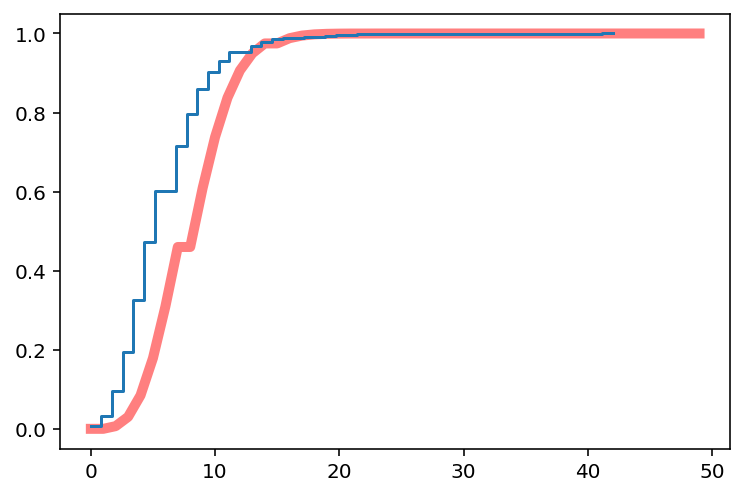

len  1065 Среднее =  6.928030303030303 Дисперсия =  13.663380968778721 delta =  6.735350665748419
i =  1070  j = 3
0 42


ZeroDivisionError: ignored

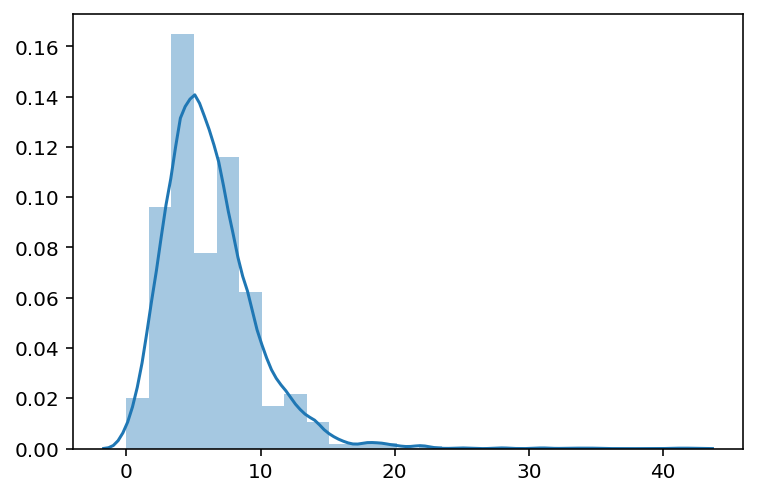

In [0]:


from scipy.stats import poisson
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt
import seaborn as sn





# sample = allinone
# ecdf = sm.distributions.ECDF(sample)
# x = np.linspace(min(sample), max(sample))
# # k = np.linspace(min(sample),max(sample),100)
# print(min(sample),max(sample))
# lam = 6.237161531279178 
# y = ecdf(x)
# plt.plot(poisson.cdf(x, lam),'r-', lw=5, alpha=0.5, label='poisson pmf')
# plt.step(x, y)
# plt.show()

# sn.distplot(allinone,bins=25)







def poisk(time1): 
  minn = 100
  mini = -1
  minj = -1
  mn = -1 
  md = -1
  for i in range(1,24):
    for j in range(i+1,22):
      allinone = []
      print('i = ', i, ' j =', j) 

      poimass1 = generebyrime(i,j,time1)
      for i in range(len(poimass)):
        allinone = allinone + poimass[i]
      sample = allinone
      ecdf = sm.distributions.ECDF(sample)
      x = np.linspace(min(sample), max(sample))
      # k = np.linspace(min(sample),max(sample),100)
      print(min(sample),max(sample))
      lennpoimas = len(poimass1)
      lam
      lam = meanpois(poimass1, lennpoimas)
      y = ecdf(x)
      plt.plot(poisson.cdf(x, lam),'r-', lw=5, alpha=0.5, label='poisson pmf')
      plt.step(x, y)
      plt.show()

      sn.distplot(allinone,bins=25)


      meanpois1 = lam
      dispersionn1 = dispersionn(poimass1, lennpoimas)
      deltt = abs(dispersionn1-meanpois1)
      print('len ', lennpoimas, 'Среднее = ', meanpois1, 'Дисперсия = ', dispersionn1, 'delta = ', deltt)
      if deltt < minn: 
        minn = deltt
        mini = i
        minj = j 
        mn = meanpois1
        md = dispersionn1
  print('минимальное при i =', mini,'минимальное при j = ', minj, 'минимальная дельта =', minn, ' минимальное среднее = ',mn ,'минимальная дисперсия = ', md) 



poisk(3600)

In [0]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 14:39:21,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 15:39:04,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 16:17:05,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:32:10,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:46:48,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
423904,40.139993,-75.049864,BUCK RD & WOODWARD DR; LOWER MORELAND; 2018-11...,19006.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:53:32,LOWER MORELAND,BUCK RD & WOODWARD DR,1
423905,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:08,LOWER SALFORD,OAK DR & MOYER RD,1
423906,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:19,LOWER SALFORD,OAK DR & MOYER RD,1
423907,40.190946,-75.237285,SUMNEYTOWN PIKE & WELLINGTON DR; LOWER GWYNEDD...,19002.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:52,LOWER GWYNEDD,SUMNEYTOWN PIKE & WELLINGTON DR,1


In [0]:
pd.crosstab(df['title'], df['twp'], margins=True)

twp,ABINGTON,AMBLER,BERKS COUNTY,BRIDGEPORT,BRYN ATHYN,BUCKS COUNTY,CHELTENHAM,CHESTER COUNTY,COLLEGEVILLE,CONSHOHOCKEN,DELAWARE COUNTY,DOUGLASS,EAST GREENVILLE,EAST NORRITON,FRANCONIA,GREEN LANE,HATBORO,HATFIELD BORO,HATFIELD TOWNSHIP,HORSHAM,JENKINTOWN,LANSDALE,LEHIGH COUNTY,LIMERICK,LOWER FREDERICK,LOWER GWYNEDD,LOWER MERION,LOWER MORELAND,LOWER POTTSGROVE,LOWER PROVIDENCE,LOWER SALFORD,MARLBOROUGH,MONTGOMERY,NARBERTH,NEW HANOVER,NORRISTOWN,NORTH WALES,PENNSBURG,PERKIOMEN,PHILA COUNTY,PLYMOUTH,POTTSTOWN,RED HILL,ROCKLEDGE,ROYERSFORD,SALFORD,SCHWENKSVILLE,SKIPPACK,SOUDERTON,SPRINGFIELD,TELFORD,TOWAMENCIN,TRAPPE,UPPER DUBLIN,UPPER FREDERICK,UPPER GWYNEDD,UPPER HANOVER,UPPER MERION,UPPER MORELAND,UPPER POTTSGROVE,UPPER PROVIDENCE,UPPER SALFORD,WEST CONSHOHOCKEN,WEST NORRITON,WEST POTTSGROVE,WHITEMARSH,WHITPAIN,WORCESTER,All
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EMS: ABDOMINAL PAINS,366,34,25,42,15,20,217,61,24,49,9,60,7,113,86,1,46,19,100,147,36,113,0,105,19,81,337,57,123,196,131,30,109,17,32,676,24,54,33,0,102,416,23,11,39,8,19,69,39,134,54,92,12,107,31,101,36,193,236,18,97,10,7,77,26,99,86,43,5799
EMS: ACTIVE SHOOTER,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
EMS: ALLERGIC REACTION,83,7,13,11,4,7,54,19,11,16,4,13,7,29,24,3,11,1,23,75,13,26,1,49,5,25,163,10,32,56,33,15,41,8,16,105,9,10,15,0,59,99,2,2,12,7,2,19,3,47,6,34,6,51,5,28,10,166,63,6,59,6,5,22,8,42,43,9,1868
EMS: ALTERED MENTAL STATUS,479,59,42,28,5,10,259,53,38,32,14,46,11,220,103,1,40,11,94,165,37,166,4,89,15,78,336,75,205,307,113,25,126,16,34,263,47,58,24,0,142,256,22,16,49,5,48,72,29,200,63,104,7,137,56,82,30,196,239,23,182,8,10,113,16,162,120,67,6182
EMS: AMPUTATION,3,0,2,0,0,0,3,1,0,1,0,0,0,1,2,0,0,0,2,3,0,0,0,1,0,2,4,2,0,4,2,0,4,0,1,1,0,2,0,0,3,1,0,0,2,0,0,0,0,0,0,0,0,0,0,1,1,10,0,0,2,0,0,0,0,2,1,1,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Traffic: ROAD OBSTRUCTION -,863,63,3,72,52,14,654,314,48,147,4,97,18,164,166,14,95,22,188,384,71,157,0,371,120,396,1870,274,315,427,162,108,242,55,197,247,68,15,41,6,435,338,10,51,59,37,12,51,45,356,22,232,19,718,44,195,48,703,404,105,373,48,188,142,90,527,234,124,14134
Traffic: VEHICLE ACCIDENT -,5678,374,36,488,159,387,5214,1170,405,487,53,674,122,1654,906,77,894,175,2219,3345,576,1502,4,2320,259,1879,10009,1936,1205,2363,922,242,3578,265,714,3821,220,234,352,94,3862,2135,108,239,311,194,84,453,367,1794,168,1628,275,3393,149,1304,405,7815,3720,452,2647,321,1546,1582,344,2841,2236,1015,98400
Traffic: VEHICLE FIRE -,93,11,0,10,1,7,134,33,9,15,3,10,2,27,33,2,9,5,34,50,14,18,0,73,2,38,203,30,47,42,21,7,45,2,17,90,2,1,5,1,89,52,3,4,7,16,2,7,7,43,5,51,5,129,2,18,15,263,81,9,80,1,53,29,10,62,57,40,2286


In [0]:
pd.crosstab(df['twp'], df['e'], margins=True)

e,1,All
twp,,
ABINGTON,25835,25835
AMBLER,2738,2738
BERKS COUNTY,1119,1119
BRIDGEPORT,2322,2322
BRYN ATHYN,835,835
...,...,...
WEST POTTSGROVE,2025,2025
WHITEMARSH,11282,11282
WHITPAIN,8639,8639


In [0]:
pd.crosstab(df['title'], df['e'], margins=True)

e,1,All
title,,
EMS: ABDOMINAL PAINS,5802,5802
EMS: ACTIVE SHOOTER,3,3
EMS: ALLERGIC REACTION,1868,1868
EMS: ALTERED MENTAL STATUS,6184,6184
EMS: AMPUTATION,65,65
...,...,...
Traffic: ROAD OBSTRUCTION -,14134,14134
Traffic: VEHICLE ACCIDENT -,98401,98401
Traffic: VEHICLE FIRE -,2286,2286


In [0]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
cols = ['title', 'twp', 'addr', 'timeStamp']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

IndexError: ignored

<Figure size 0x0 with 0 Axes>

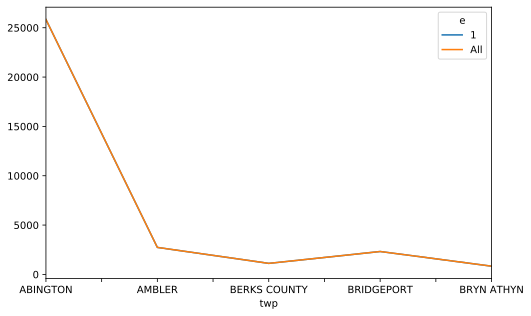

In [0]:
pd.crosstab(df['twp'], df['e'], margins=True)[0:5].plot()

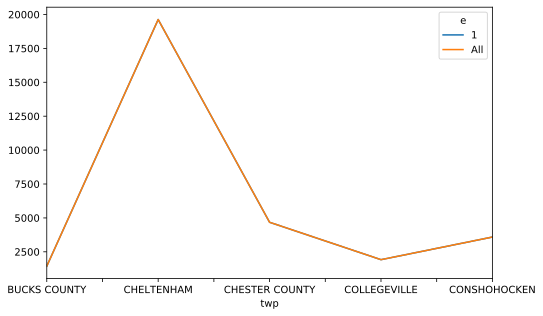

In [0]:
pd.crosstab(df['twp'], df['e'], margins=True)[5:10].plot()

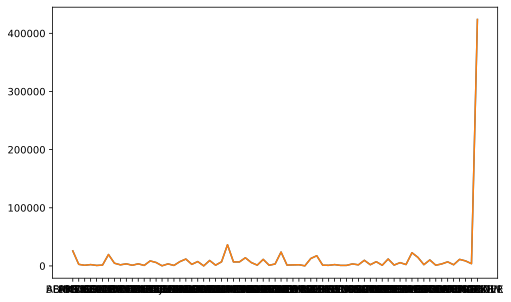

In [0]:
fig, ax = plt.subplots()
ax.plot(pd.crosstab(df['twp'], df['e'], margins=True))
# ax.set_xticklabels(rotation=45)
# show()

NameError: ignored

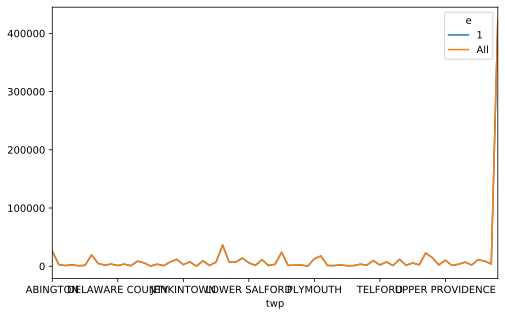

In [0]:
chart = pd.crosstab(df['twp'], df['e'], margins=True).plot()
chart = set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'ABINGTON'),
 Text(0, 0, 'AMBLER'),
 Text(0, 0, 'BERKS COUNTY'),
 Text(0, 0, 'BRIDGEPORT'),
 Text(0, 0, 'BRYN ATHYN'),
 Text(0, 0, 'BUCKS COUNTY'),
 Text(0, 0, 'CHELTENHAM'),
 Text(0, 0, 'CHESTER COUNTY'),
 Text(0, 0, 'COLLEGEVILLE'),
 Text(0, 0, 'CONSHOHOCKEN'),
 Text(0, 0, 'DELAWARE COUNTY'),
 Text(0, 0, 'DOUGLASS'),
 Text(0, 0, 'EAST GREENVILLE'),
 Text(0, 0, 'EAST NORRITON'),
 Text(0, 0, 'FRANCONIA'),
 Text(0, 0, 'GREEN LANE'),
 Text(0, 0, 'HATBORO'),
 Text(0, 0, 'HATFIELD BORO'),
 Text(0, 0, 'HATFIELD TOWNSHIP'),
 Text(0, 0, 'HORSHAM'),
 Text(0, 0, 'JENKINTOWN'),
 Text(0, 0, 'LANSDALE'),
 Text(0, 0, 'LEHIGH COUNTY'),
 Text(0, 0, 'LIMERICK'),
 Text(0, 0, 'LOWER FREDERICK'),
 Text(0, 0, 'LOWER GWYNEDD'),
 Text(0, 0, 'LOWER MERION'),
 Text(0, 0, 'LOWER MORELAND'),
 Text(0, 0, 'LOWER POTTSGROVE'),
 Text(0, 0, 'LOWER PROVIDENCE'),
 Text(0, 0, 'LOWER SALFORD'),
 Text(0, 0, 'MARLBOROUGH'),
 Text(0, 0, 'MONTGOMERY'),
 Text(0, 0, 'NARBERTH'),
 Text(0, 0, 'NEW HANOVER'),
 Text(0

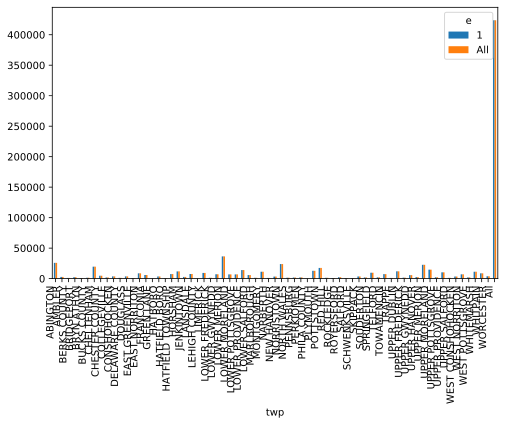

In [0]:
chart = pd.crosstab(df['twp'], df['e'], margins=True).plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')

[Text(0, 0, 'EMS: ABDOMINAL PAINS'),
 Text(0, 0, 'EMS: ACTIVE SHOOTER'),
 Text(0, 0, 'EMS: ALLERGIC REACTION'),
 Text(0, 0, 'EMS: ALTERED MENTAL STATUS'),
 Text(0, 0, 'EMS: AMPUTATION'),
 Text(0, 0, 'EMS: ANIMAL BITE'),
 Text(0, 0, 'EMS: APPLIANCE FIRE'),
 Text(0, 0, 'EMS: ARMED SUBJECT'),
 Text(0, 0, 'EMS: ASSAULT VICTIM'),
 Text(0, 0, 'EMS: BACK PAINS/INJURY'),
 Text(0, 0, 'EMS: BOMB DEVICE FOUND'),
 Text(0, 0, 'EMS: BOMB THREAT'),
 Text(0, 0, 'EMS: BUILDING FIRE'),
 Text(0, 0, 'EMS: BURN VICTIM'),
 Text(0, 0, 'EMS: CARBON MONOXIDE DETECTOR'),
 Text(0, 0, 'EMS: CARDIAC ARREST'),
 Text(0, 0, 'EMS: CARDIAC EMERGENCY'),
 Text(0, 0, 'EMS: CHOKING'),
 Text(0, 0, 'EMS: CVA/STROKE'),
 Text(0, 0, 'EMS: DEBRIS/FLUIDS ON HIGHWAY'),
 Text(0, 0, 'EMS: DEHYDRATION'),
 Text(0, 0, 'EMS: DIABETIC EMERGENCY'),
 Text(0, 0, 'EMS: DISABLED VEHICLE'),
 Text(0, 0, 'EMS: DIZZINESS'),
 Text(0, 0, 'EMS: DROWNING'),
 Text(0, 0, 'EMS: ELECTRICAL FIRE OUTSIDE'),
 Text(0, 0, 'EMS: ELECTROCUTION'),
 Text(0, 0, 'E

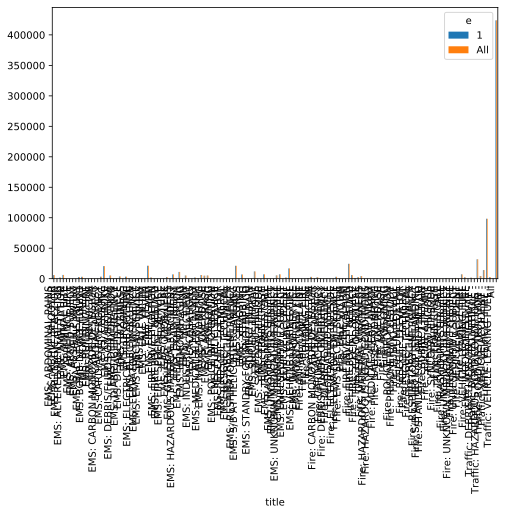

In [60]:
chart = pd.crosstab(df['title'], df['e'], margins=True).plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')


In [65]:
pd.crosstab(df['title'], df['e'], margins=True).max()

e
1      False
All    False
dtype: bool